In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
DATA_SOURCE = "./dataset/SWaT"

In [14]:
series_data = pd.read_csv(os.path.join(DATA_SOURCE, "SWaT_Dataset_Normal_v0.csv"), delimiter = ",")

In [15]:
cols = [col for col in series_data]

In [17]:
cols[0]

' Timestamp'

In [18]:
train, train_label = series_data.drop([cols[0], cols[-1]], axis = 1), series_data[cols[-1]]

In [19]:
train

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,2,...,0.000000,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1
1,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,2,...,0.000000,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1
2,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,2,...,0.000000,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1
3,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,2,...,0.000000,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1
4,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,2,...,0.000000,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,0.308619,2,1,250.81710,1.778105,189.855200,0.000128,1,1,1
496796,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,0.308619,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1
496797,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,2,...,0.308619,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1
496798,2.428338,522.9252,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.308619,2,1,250.81710,1.649953,189.502700,0.000128,1,1,1


In [28]:
train_label = train_label.astype('category').cat.codes

NameError: name 'test_label' is not defined

In [107]:
attack_data = pd.read_csv(os.path.join(DATA_SOURCE, "SWaT_Dataset_Attack_v0.csv"), delimiter = ",")

In [108]:
ppr_idx = attack_data[attack_data[cols[-1]] == "A ttack"][cols[-1]].index

In [109]:
attack_data.loc[ppr_idx, cols[-1]] = "Attack"

In [110]:
attack_data[cols[-1]].value_counts()

Normal    395298
Attack     54621
Name: Normal/Attack, dtype: int64

In [111]:
test, test_label = attack_data.drop([cols[0], cols[-1]], axis = 1), attack_data[cols[-1]]

In [112]:
test_label.value_counts()

Normal    395298
Attack     54621
Name: Normal/Attack, dtype: int64

In [113]:
test_label = test_label.astype("category")
test_label = test_label.cat.set_categories(["Normal", "Attack"])

In [114]:
test_label = test_label.cat.codes

In [115]:
test_label.value_counts()

0    395298
1     54621
dtype: int64

In [119]:
len(train), len(train_label), len(test), len(test_label)

(496800, 496800, 449919, 449919)

In [125]:
train.to_csv(os.path.join(DATA_SOURCE, "train.csv"), index = False)

In [126]:
train_label.to_csv(os.path.join(DATA_SOURCE, "train_label.csv"), index = False)

In [127]:
test.to_csv(os.path.join(DATA_SOURCE, "test.csv"), index = False)

In [131]:
test_label.to_csv(os.path.join(DATA_SOURCE, "test_label.csv"), index = False)

In [138]:
attacks = []

start_idx, end_idx = None, None
for i in range(len(attack_data)):
    if attack_data.iloc[i]["Normal/Attack"] == "Attack":
        if start_idx == None:
            start_idx = i
        if i == len(attack_data)-1:
            start, end = attack_data.index[start_idx], attack_data.index[end_idx]
            attacks.append((start, end))
            start_idx, end_idx = None, None
    else:
        if start_idx is not None and end_idx is None:
            end_idx = i-1
            start, end = attack_data.index[start_idx], attack_data.index[end_idx]
            print(start_idx, end_idx)
            print(start, end)
            attacks.append((start, end))
            start_idx, end_idx = None, None

1754 2693
2015-12-28 10:29:14 2015-12-28 10:44:53
3068 3510
2015-12-28 10:51:08 2015-12-28 10:58:30
4920 5302
2015-12-28 11:22:00 2015-12-28 11:28:22
6459 6848
2015-12-28 11:47:39 2015-12-28 11:54:08
7255 7450
2015-12-28 12:00:55 2015-12-28 12:04:10
7705 8133
2015-12-28 12:08:25 2015-12-28 12:15:33
11410 12373
2015-12-28 13:10:10 2015-12-28 13:26:13
15380 16100
2015-12-28 14:16:20 2015-12-28 14:28:20
73800 74520
2015-12-29 06:30:00 2015-12-29 06:42:00
90685 90917
2015-12-29 11:11:25 2015-12-29 11:15:17
92140 92570
2015-12-29 11:35:40 2015-12-29 11:42:50
93445 93720
2015-12-29 11:57:25 2015-12-29 12:02:00
103092 103808
2015-12-29 14:38:12 2015-12-29 14:50:08
115843 116101
2015-12-29 18:10:43 2015-12-29 18:15:01
116143 116537
2015-12-29 18:15:43 2015-12-29 18:22:17
117000 117720
2015-12-29 18:30:00 2015-12-29 18:42:00
132918 133380
2015-12-29 22:55:18 2015-12-29 23:03:00
142954 143650
2015-12-30 01:42:34 2015-12-30 01:54:10
172305 172588
2015-12-30 09:51:45 2015-12-30 09:56:28
172910 173

In [139]:
attacks

[(Timestamp('2015-12-28 10:29:14'), Timestamp('2015-12-28 10:44:53')),
 (Timestamp('2015-12-28 10:51:08'), Timestamp('2015-12-28 10:58:30')),
 (Timestamp('2015-12-28 11:22:00'), Timestamp('2015-12-28 11:28:22')),
 (Timestamp('2015-12-28 11:47:39'), Timestamp('2015-12-28 11:54:08')),
 (Timestamp('2015-12-28 12:00:55'), Timestamp('2015-12-28 12:04:10')),
 (Timestamp('2015-12-28 12:08:25'), Timestamp('2015-12-28 12:15:33')),
 (Timestamp('2015-12-28 13:10:10'), Timestamp('2015-12-28 13:26:13')),
 (Timestamp('2015-12-28 14:16:20'), Timestamp('2015-12-28 14:28:20')),
 (Timestamp('2015-12-29 06:30:00'), Timestamp('2015-12-29 06:42:00')),
 (Timestamp('2015-12-29 11:11:25'), Timestamp('2015-12-29 11:15:17')),
 (Timestamp('2015-12-29 11:35:40'), Timestamp('2015-12-29 11:42:50')),
 (Timestamp('2015-12-29 11:57:25'), Timestamp('2015-12-29 12:02:00')),
 (Timestamp('2015-12-29 14:38:12'), Timestamp('2015-12-29 14:50:08')),
 (Timestamp('2015-12-29 18:10:43'), Timestamp('2015-12-29 18:15:01')),
 (Time

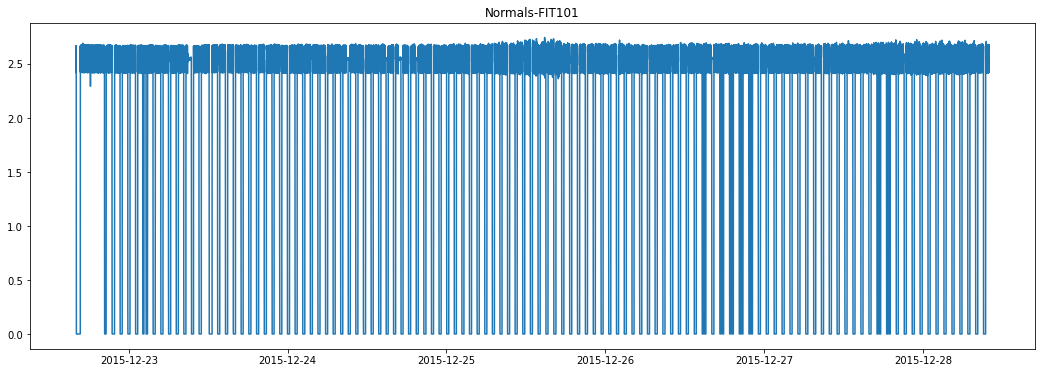

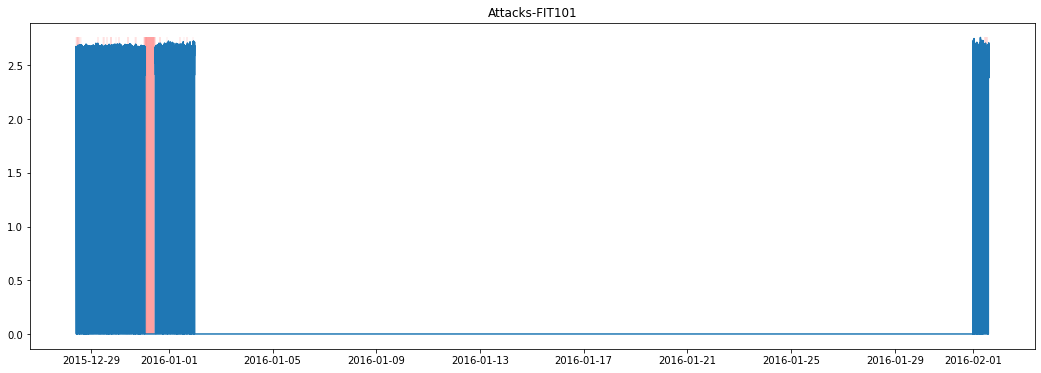

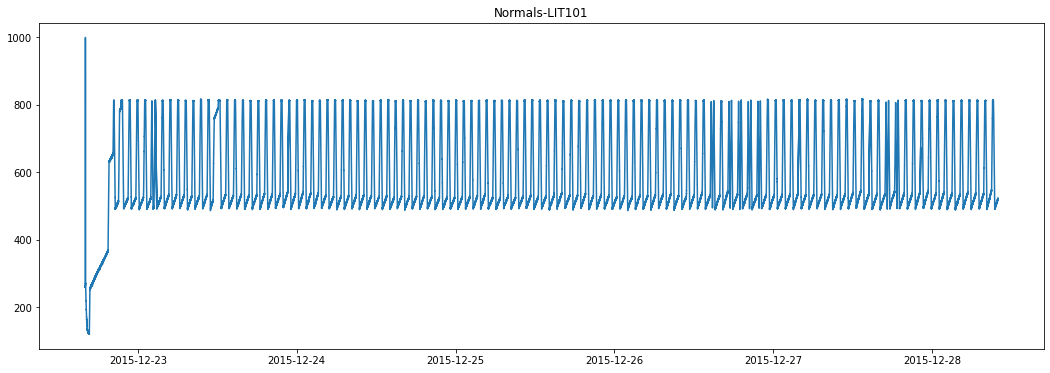

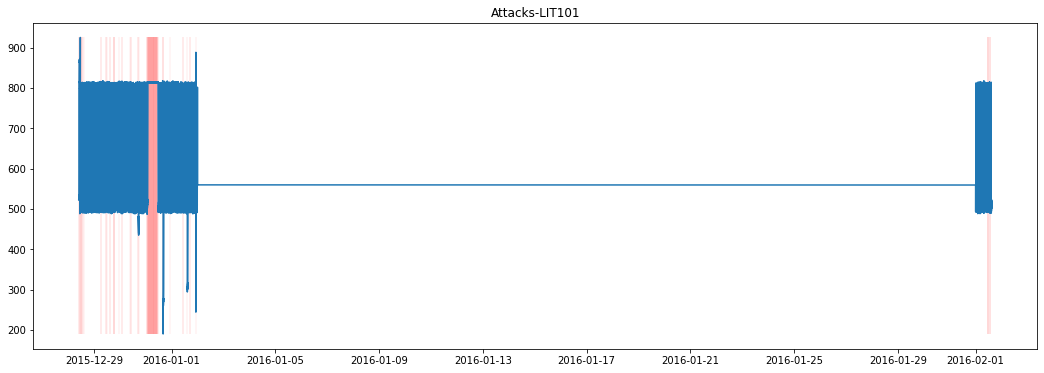

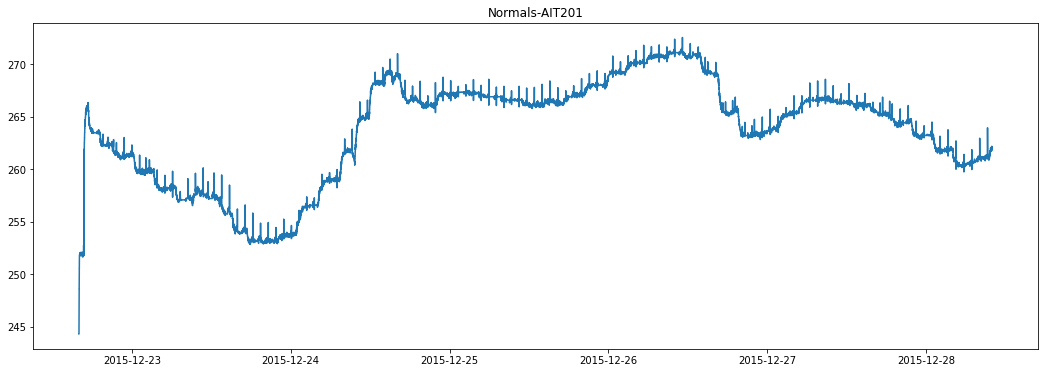

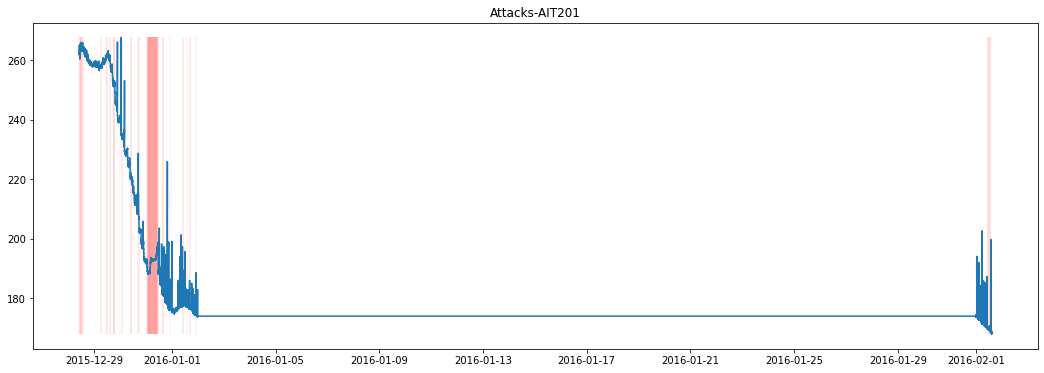

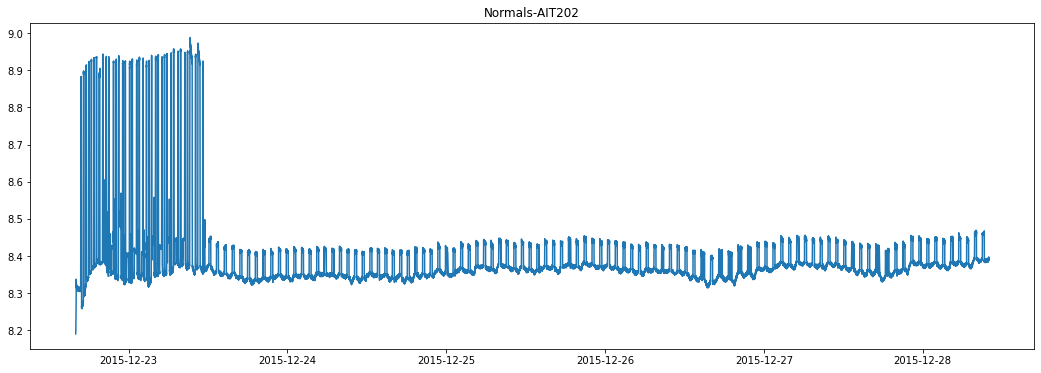

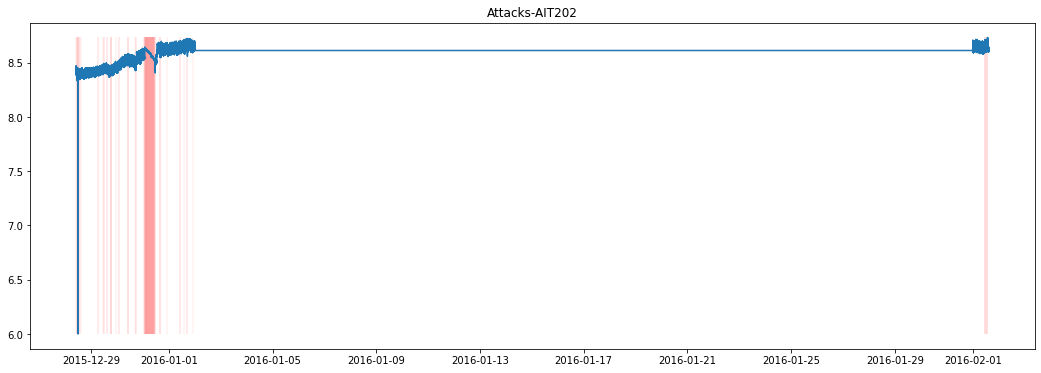

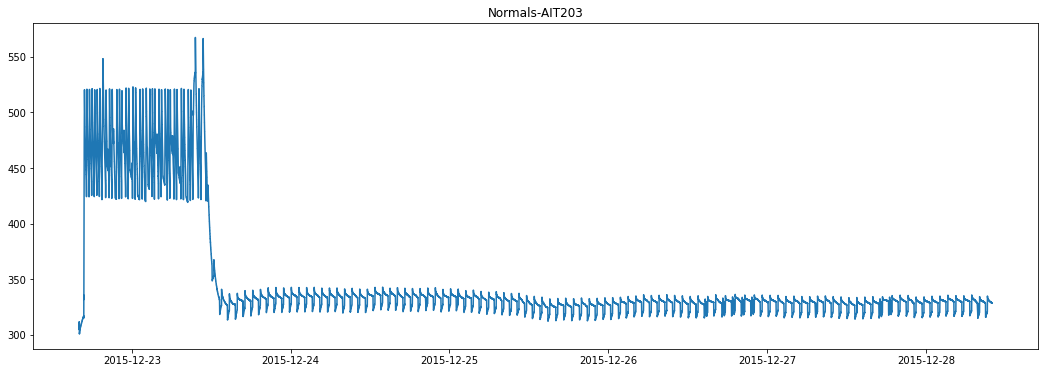

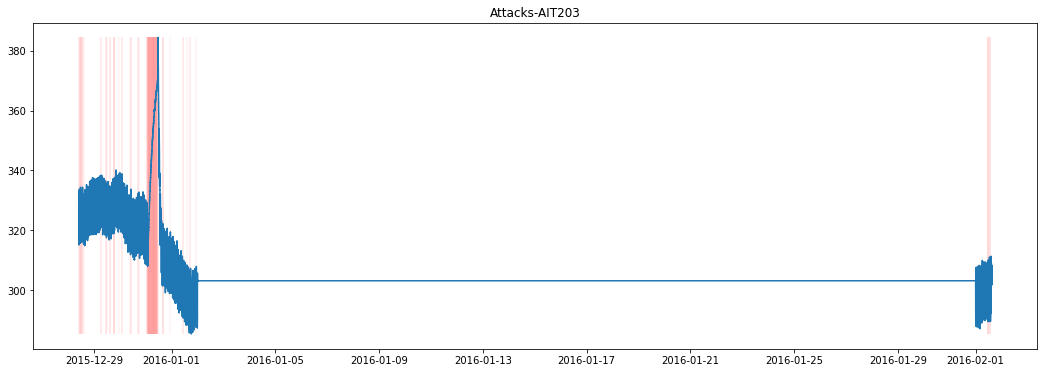

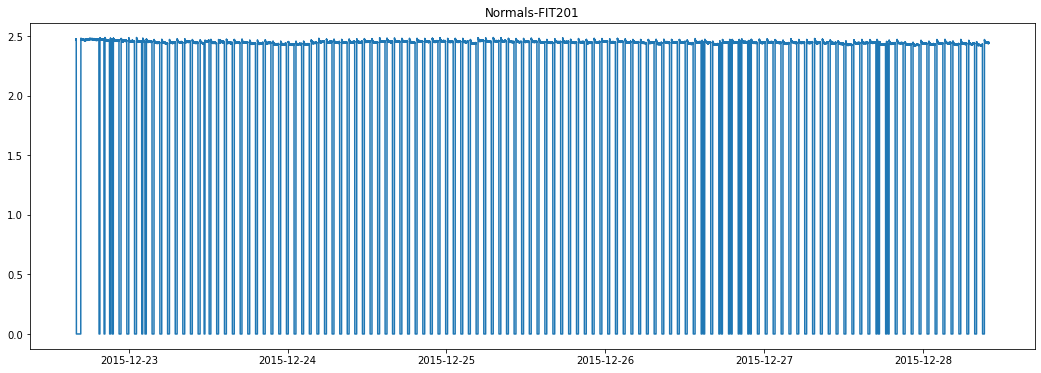

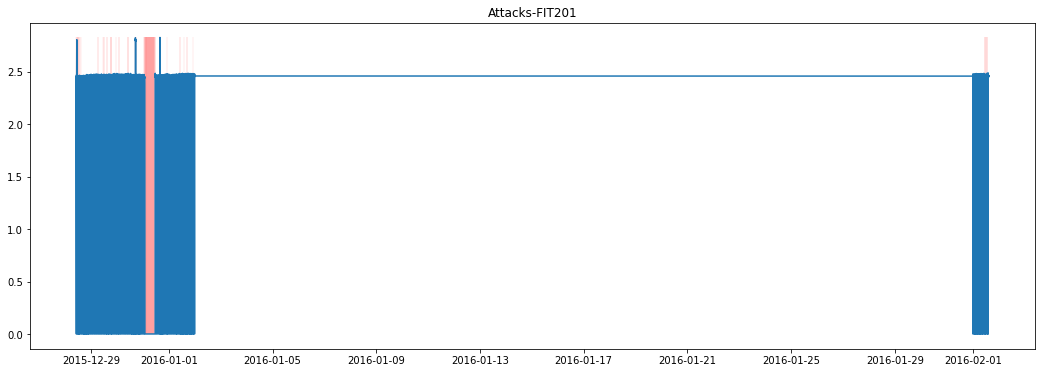

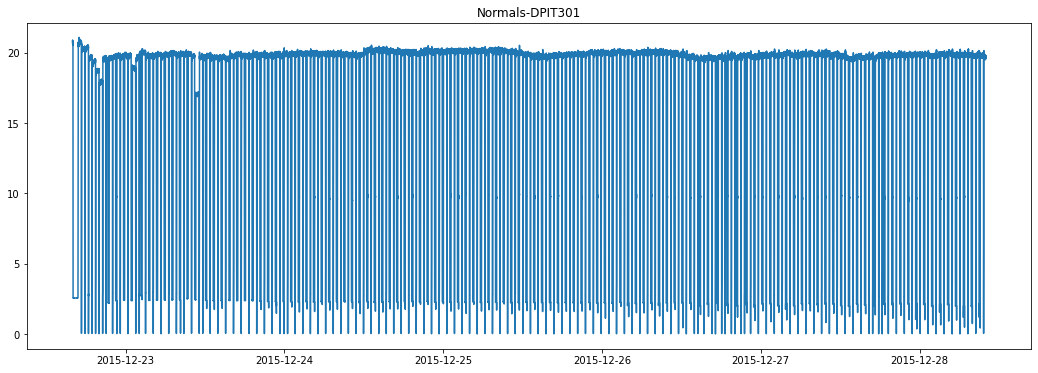

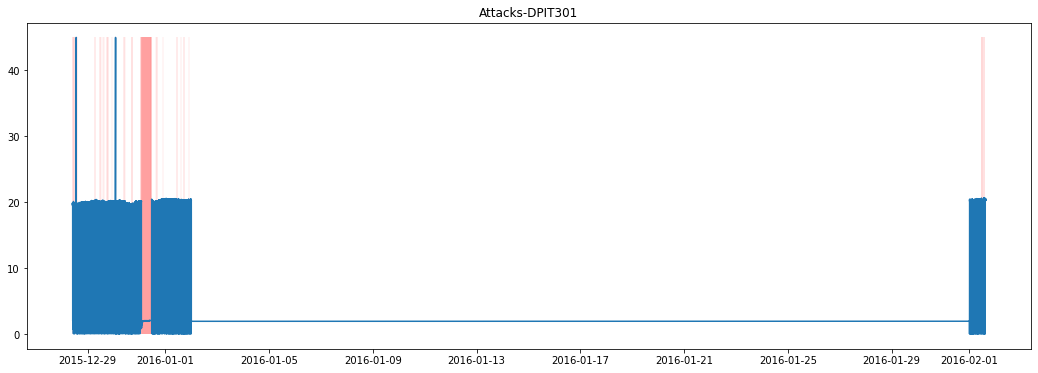

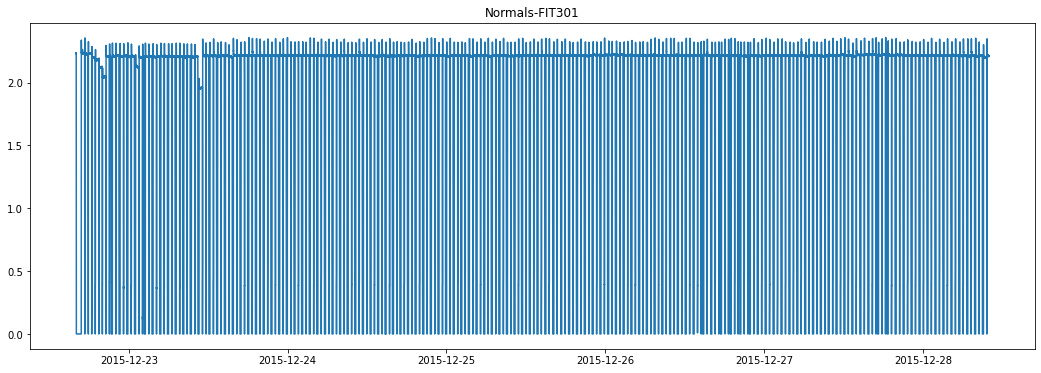

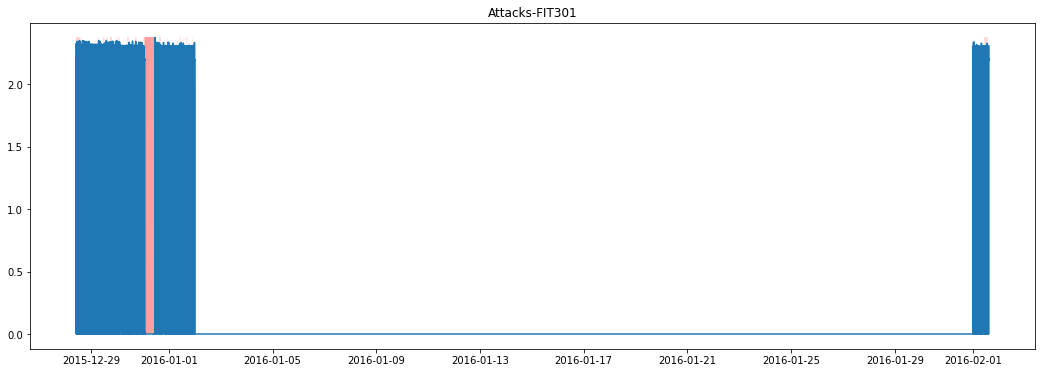

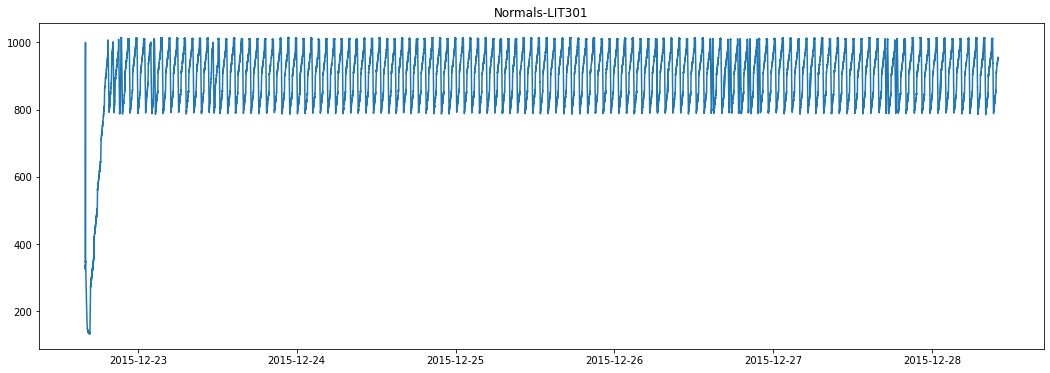

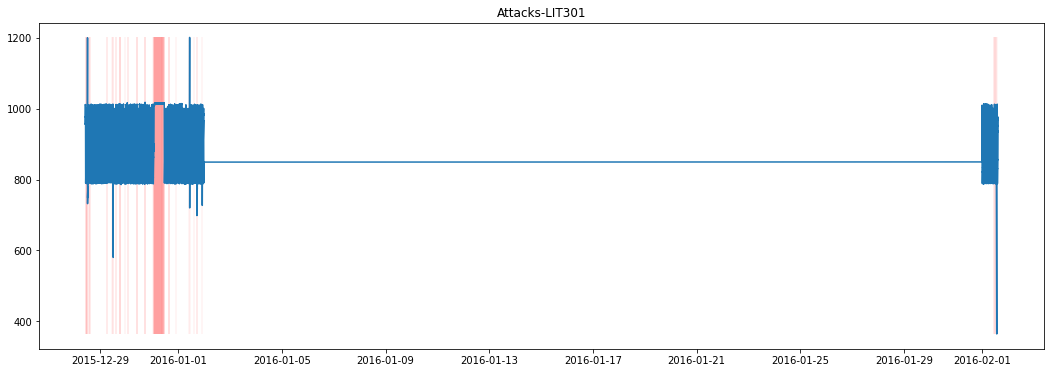

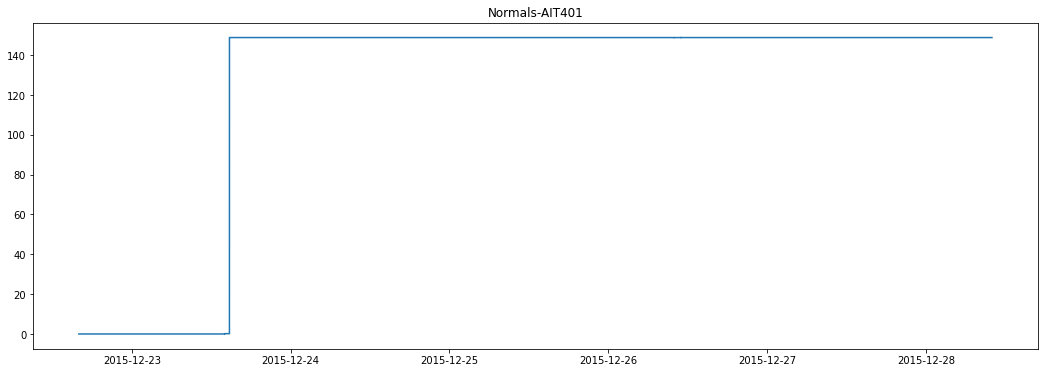

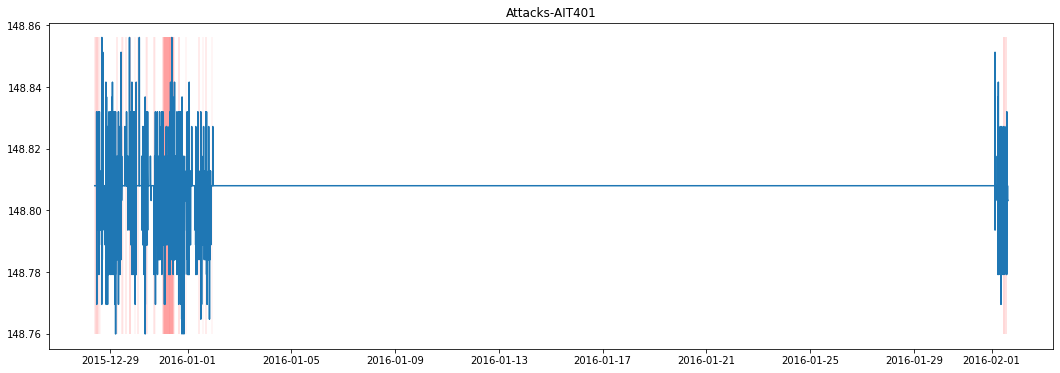

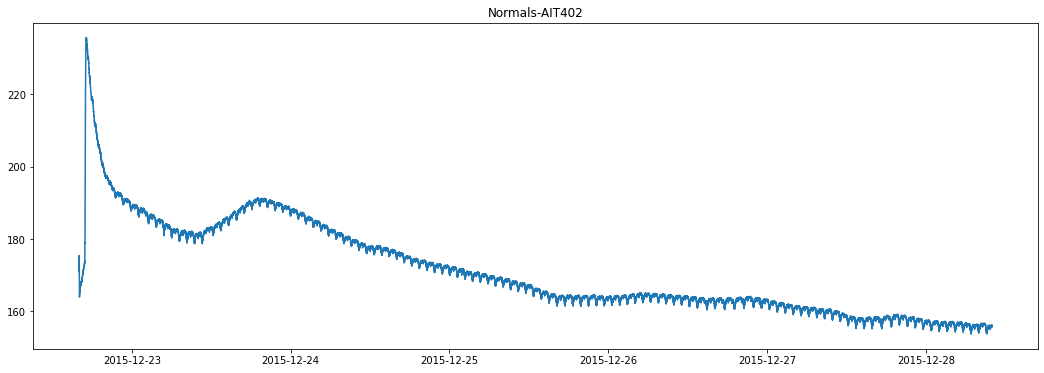

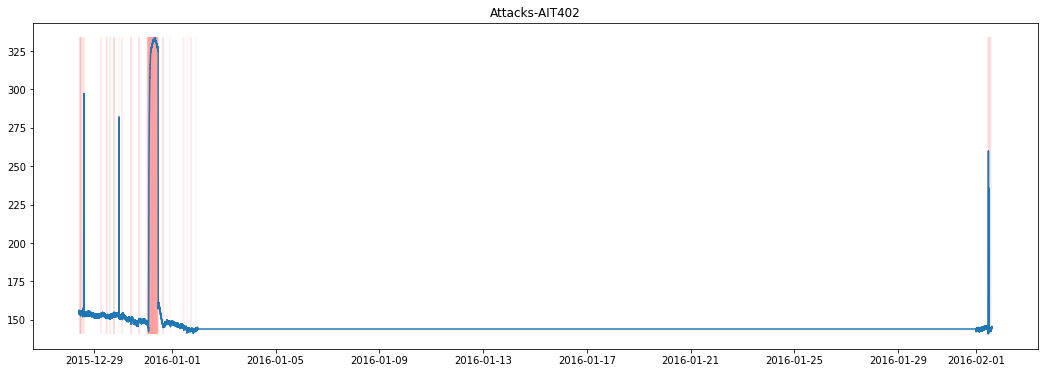

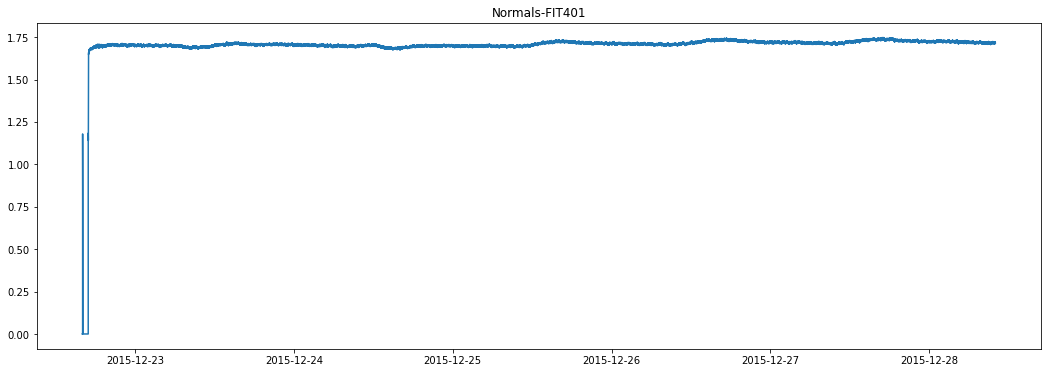

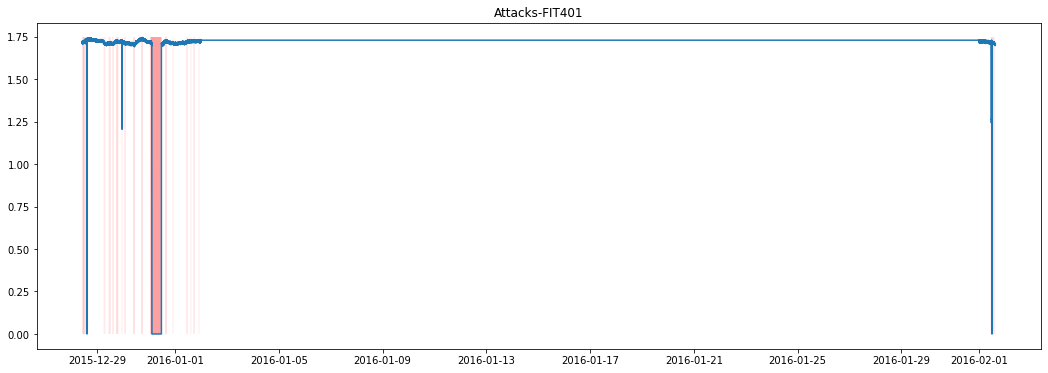

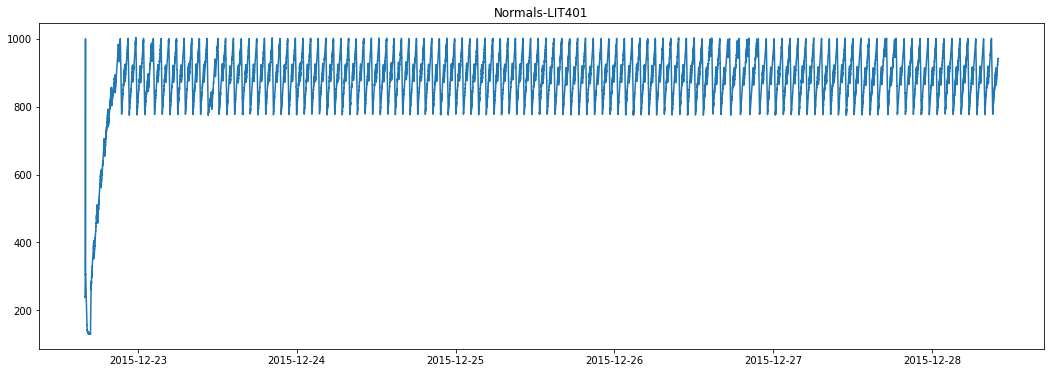

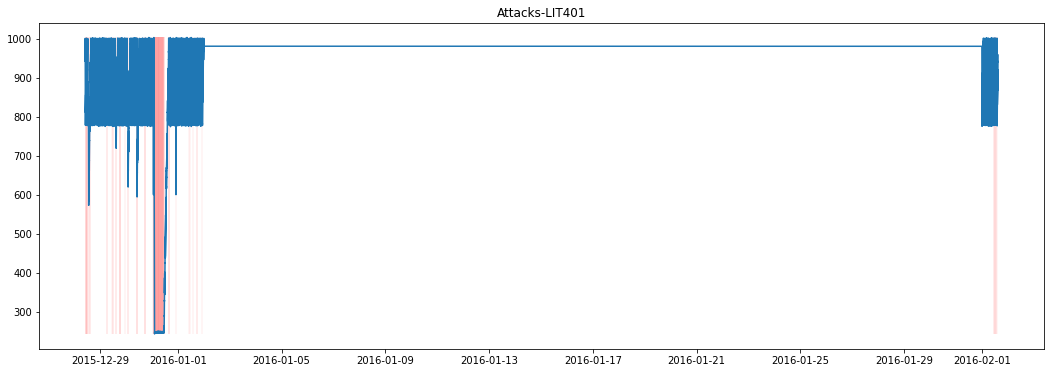

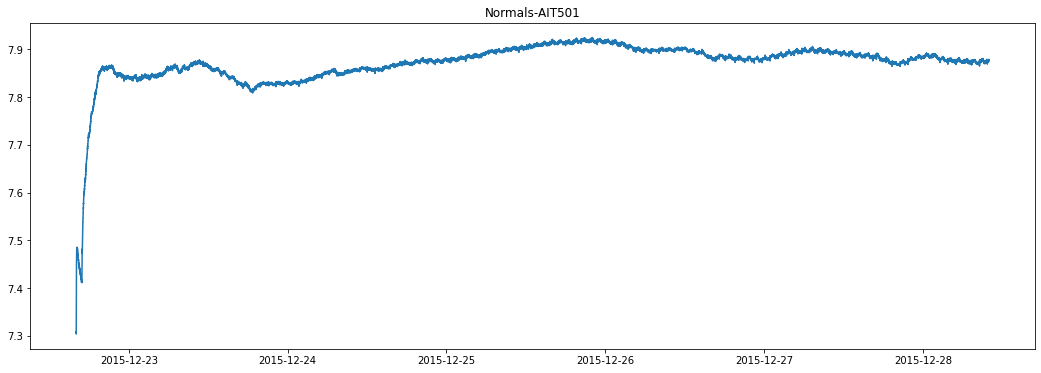

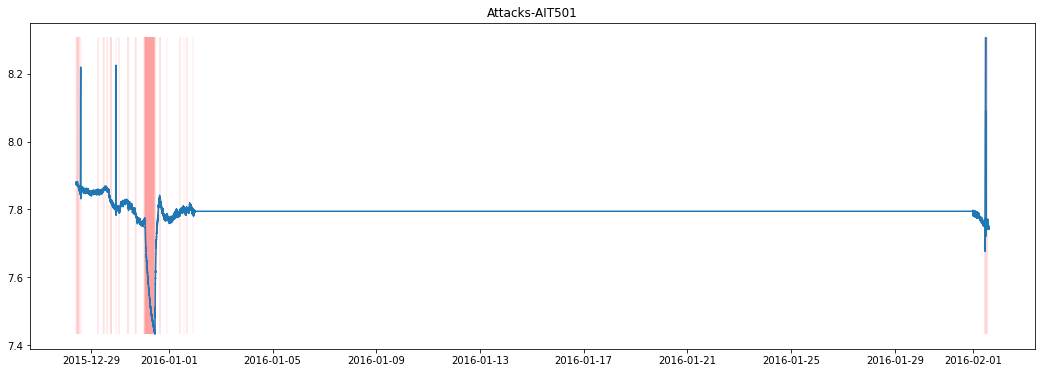

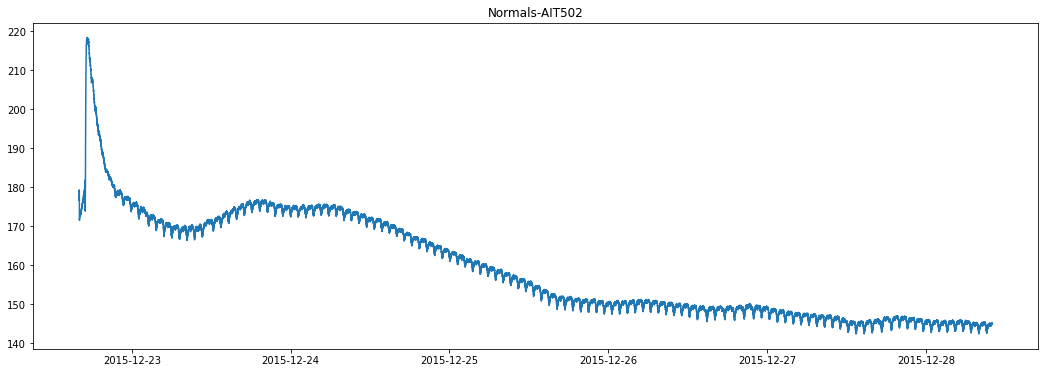

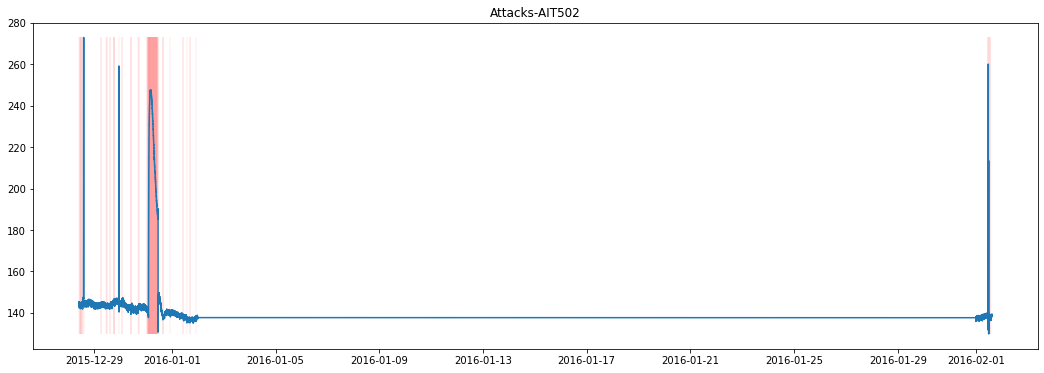

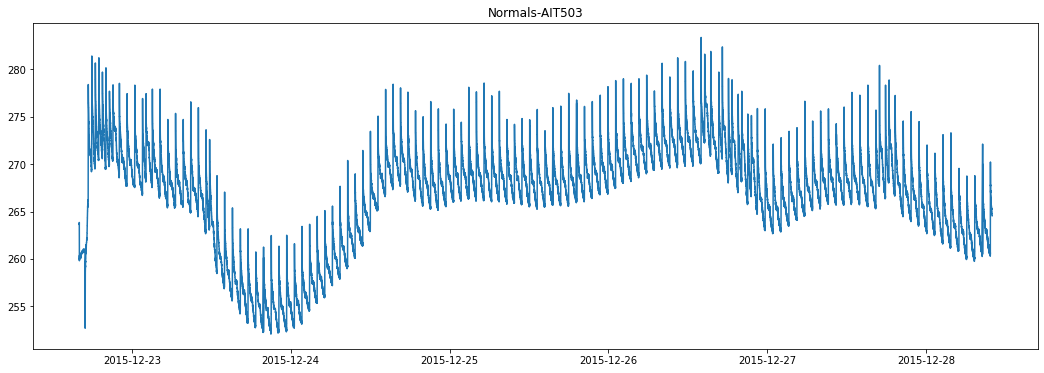

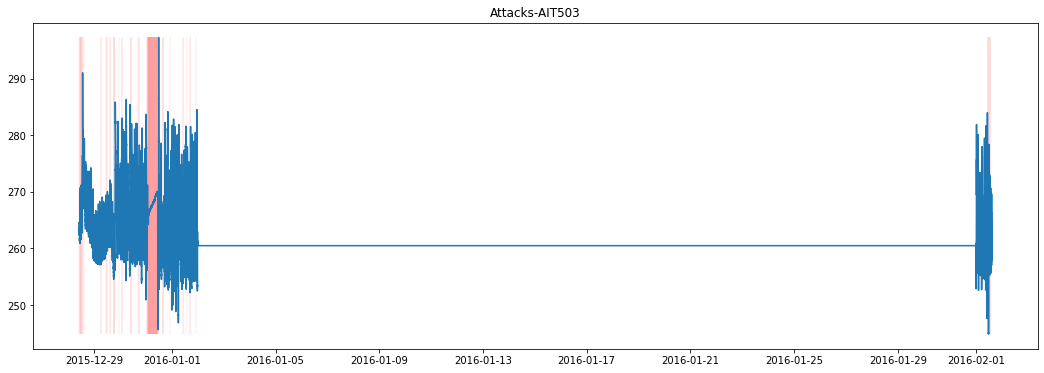

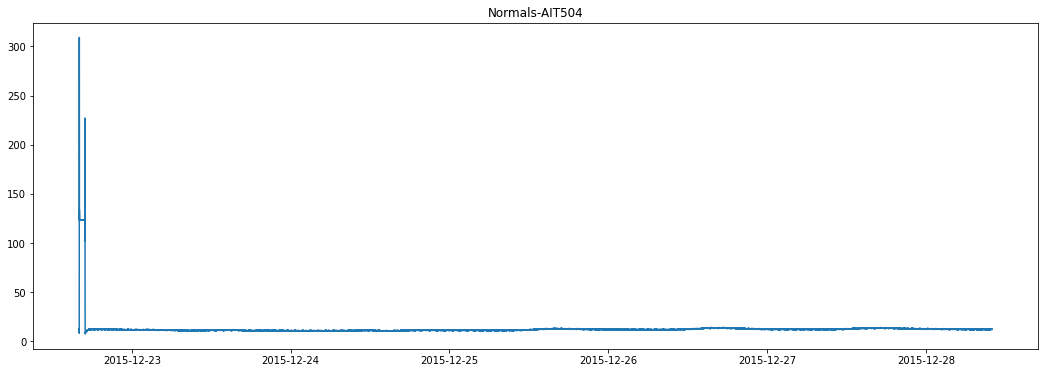

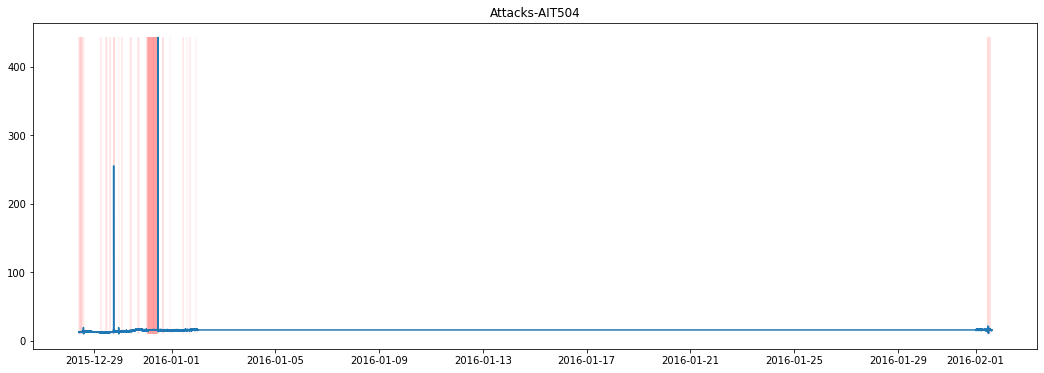

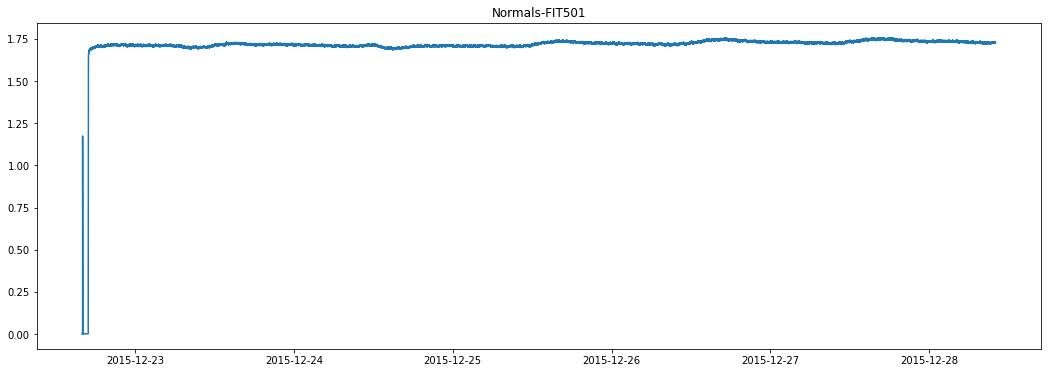

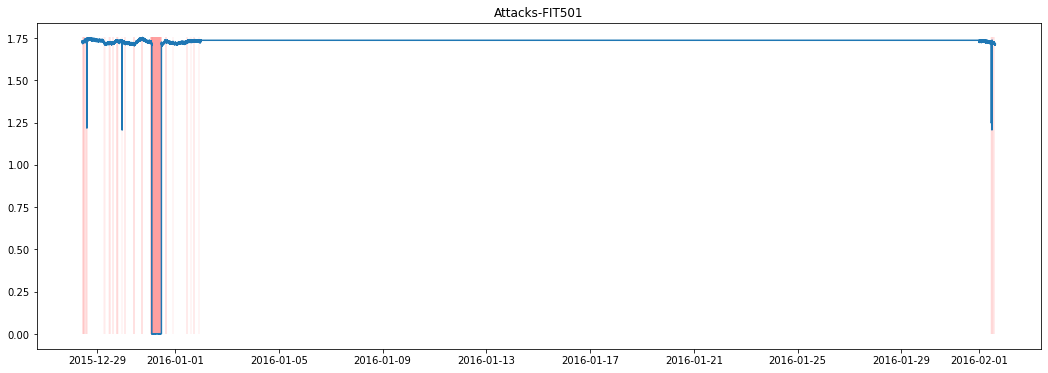

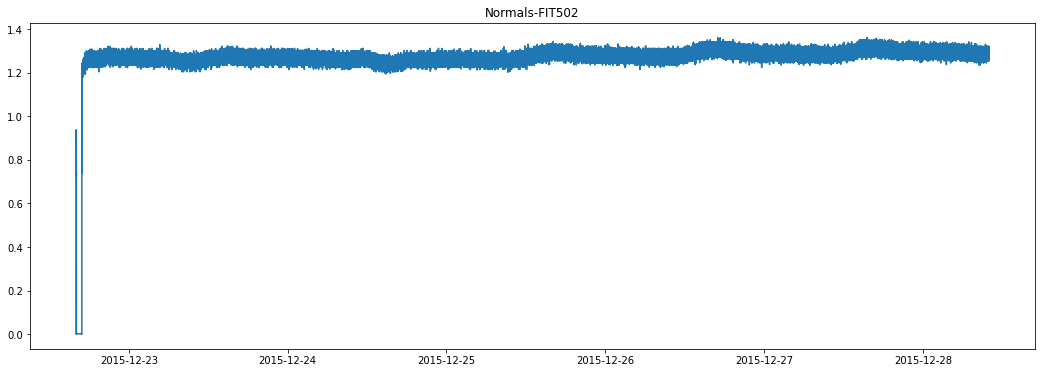

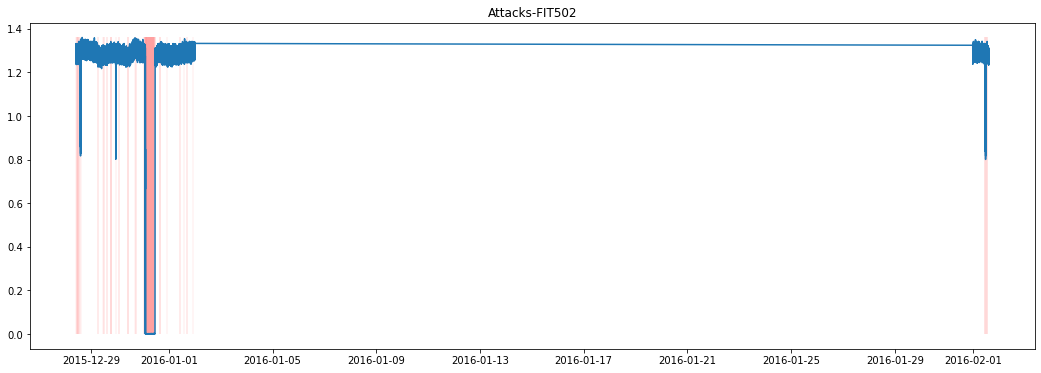

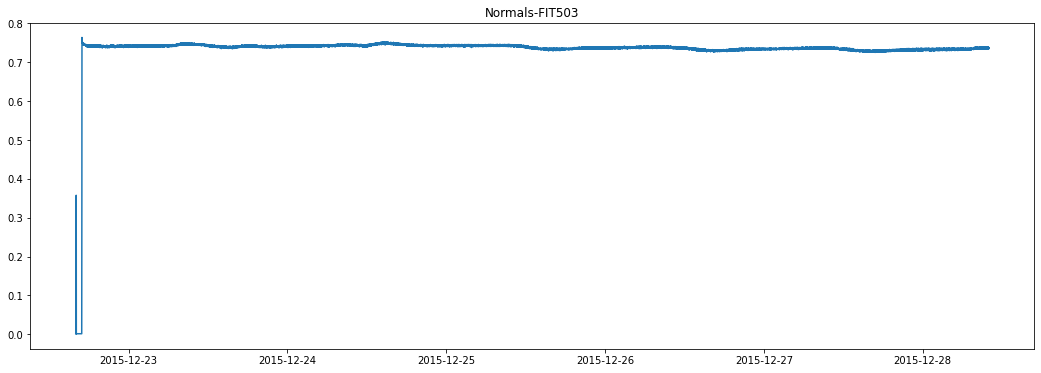

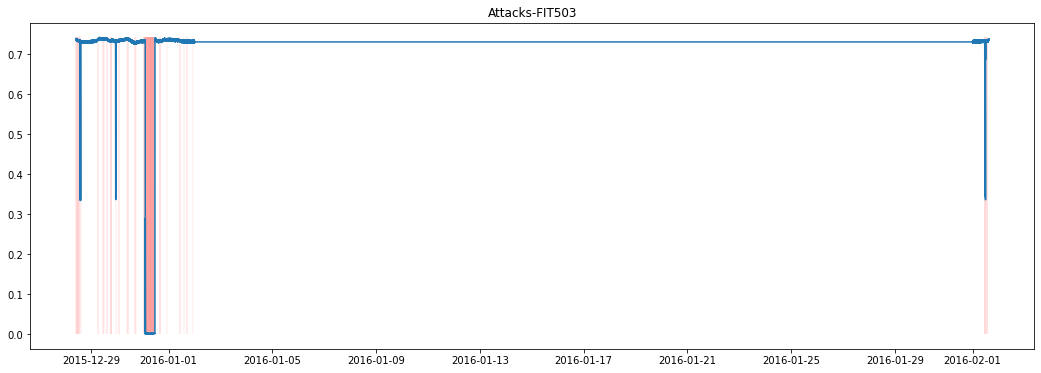

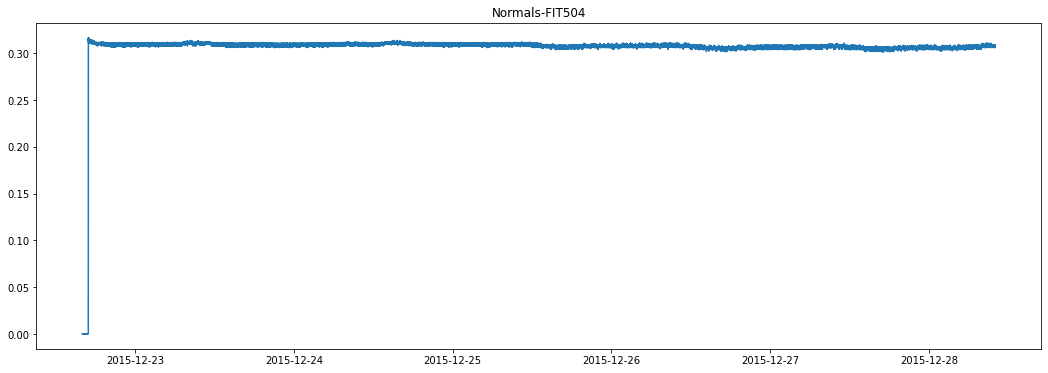

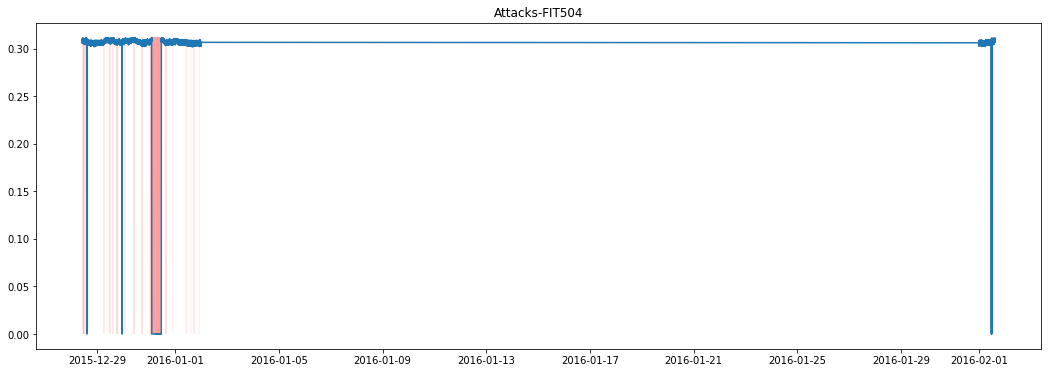

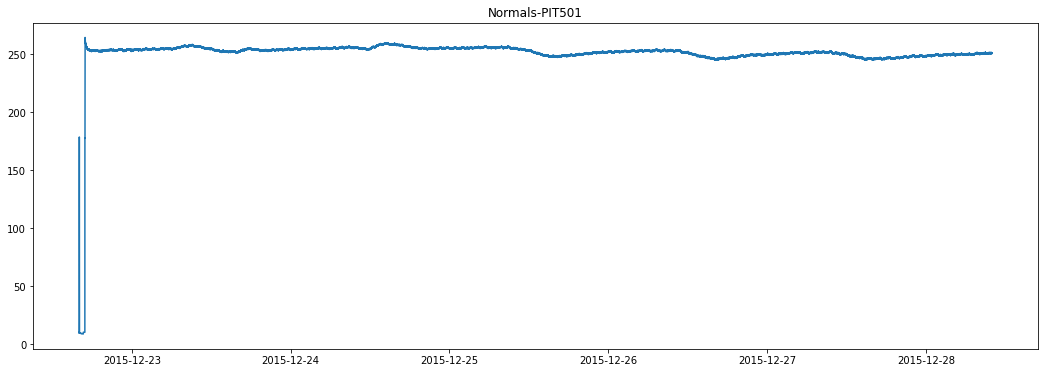

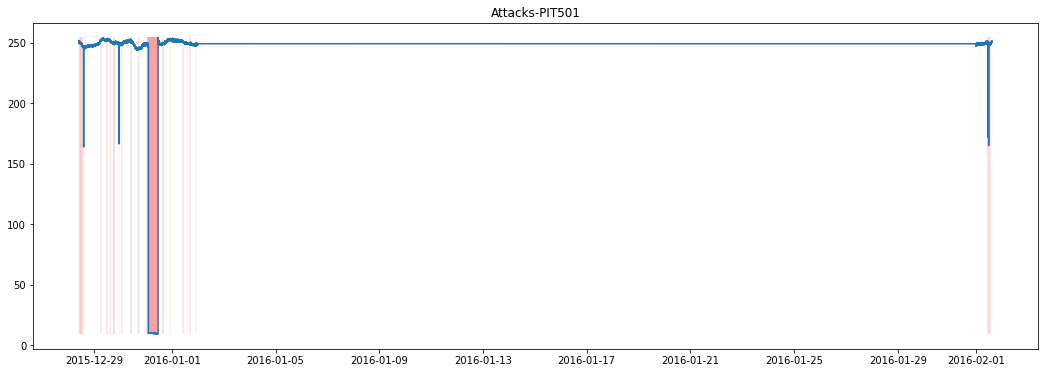

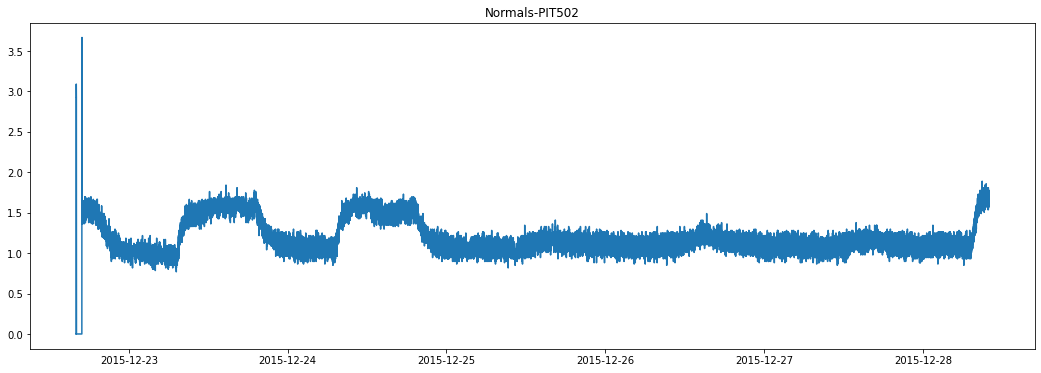

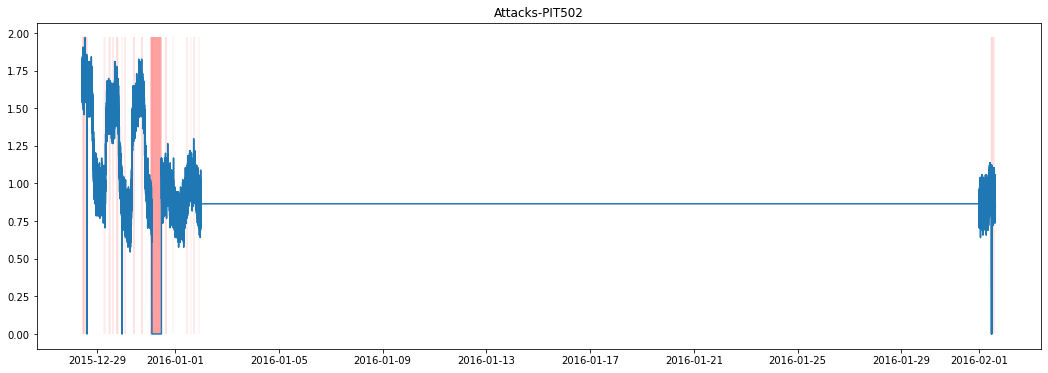

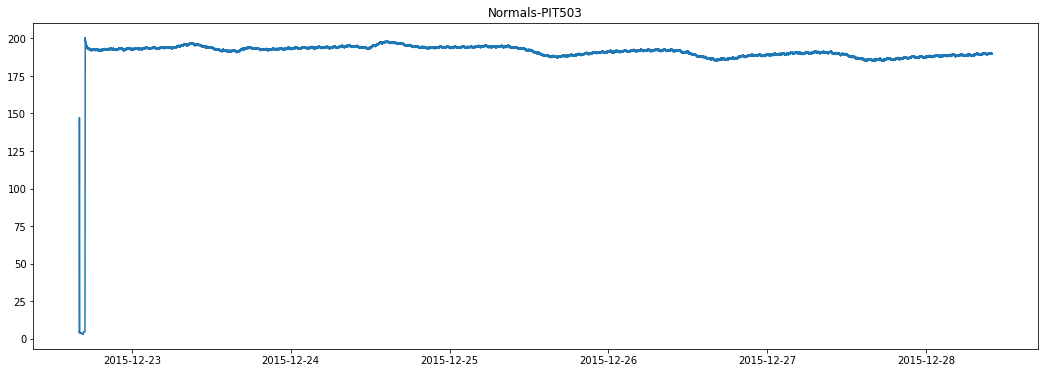

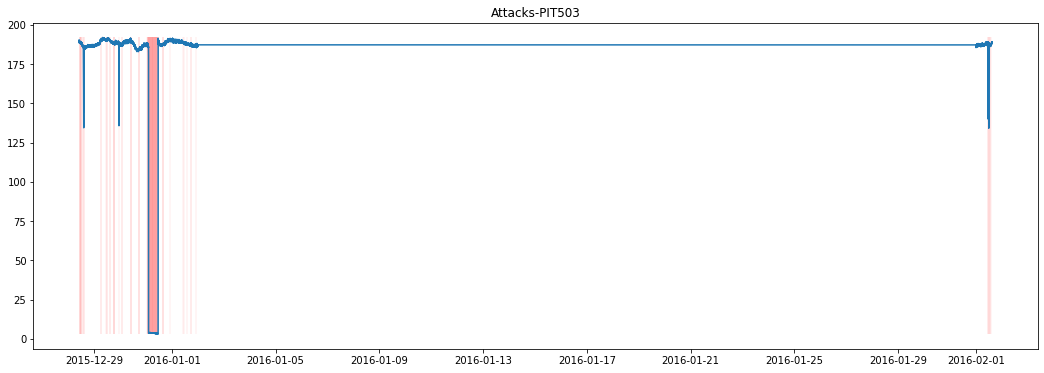

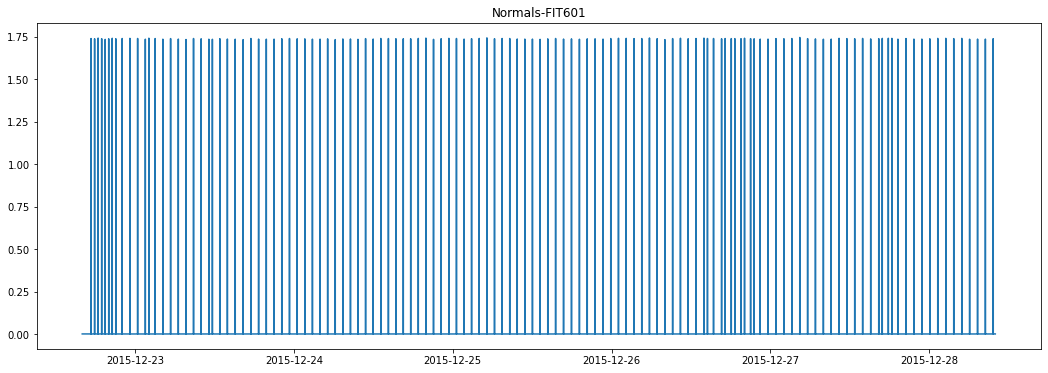

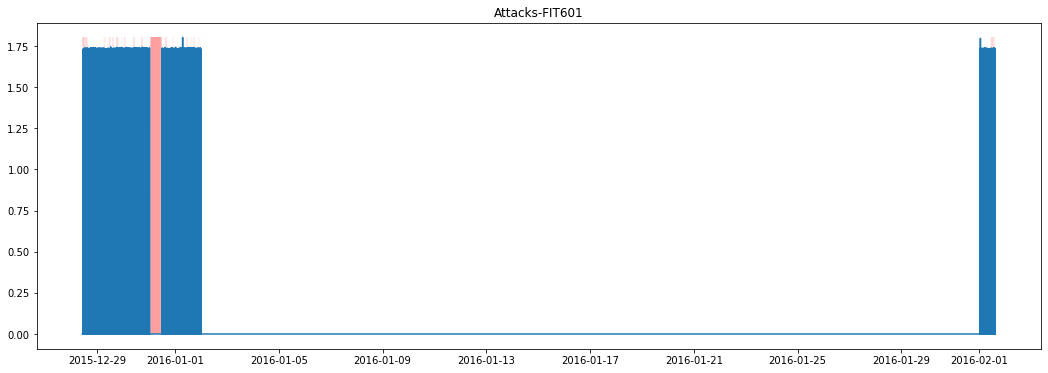

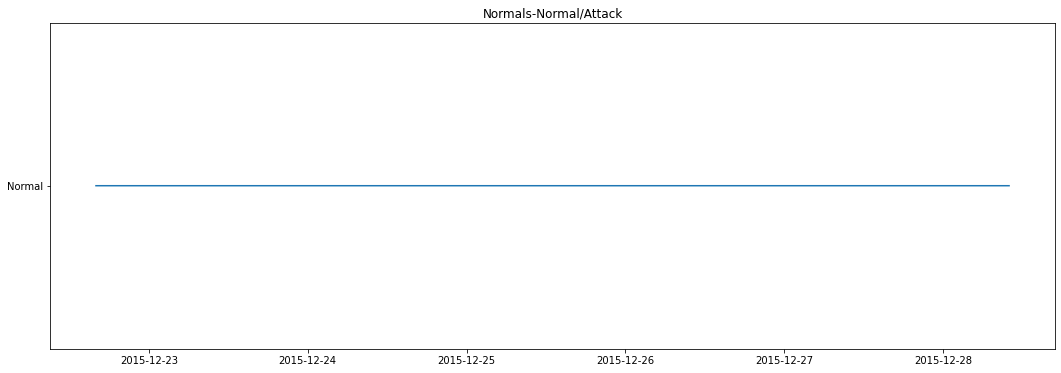

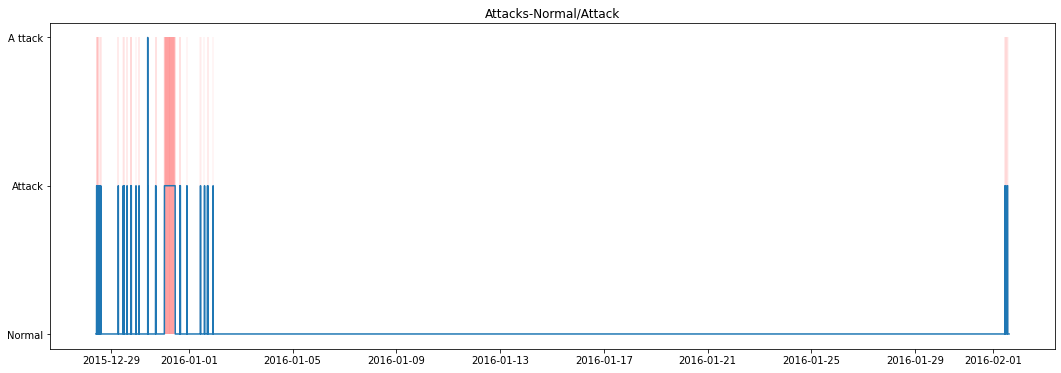

In [140]:
attack_data.columns = series_data.columns 

for c in series_data.columns:
    
    if series_data[c].dtype != "int64": #and c == "2_LT_002_PV":
        plt.title(f"Normals-{c}")
        plt.plot(series_data[c])#[0:172801])
        plt.gca().xaxis.set_major_formatter(datefmt)
        #plt.ylim(20, 90)
        plt.show()
        
        plt.title(f"Attacks-{c}")
        plt.plot(attack_data[c])
        plt.gca().xaxis.set_major_formatter(datefmt)
        

        start, end = None, None
        alpha = 0.05
        ymin, ymax = attack_data[c].min(), attack_data[c].max()
        
        for i in range(len(attacks)):
            start, end = attacks[i][0], attacks[i][1]
            plt.vlines(x = pd.date_range(start, end, freq = "600S"), ymin=ymin, ymax =ymax , color = "r", alpha = alpha)
        plt.show()        